In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [2]:
df=pd.DataFrame(dataset)

In [3]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward

In [4]:
columns_to_drop=[ ' Fwd Packet Length Max',' Fwd Packet Length Std','Flow Bytes/s',
                 ' Flow Packets/s',' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
                 'Fwd IAT Total',  ' Fwd IAT Std', ' Fwd IAT Max',' Fwd IAT Min',
                  'Bwd IAT Total', ' Fwd Header Length',' Bwd Header Length',
                  ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
                 ' Packet Length Std', ' Packet Length Variance', ' Average Packet Size',
                  ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',' Fwd Header Length.1',
                  'Subflow Fwd Packets', ' Subflow Fwd Bytes',' Subflow Bwd Packets',
                  ' Subflow Bwd Bytes','Init_Win_bytes_forward',' Init_Win_bytes_backward',
                  ' act_data_pkt_fwd',' min_seg_size_forward']

df = df.drop(columns=columns_to_drop)

In [5]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Mean',
       ' Bwd Packet Length Mean', ' Flow IAT Mean', ' Fwd IAT Mean',
       'Fwd Packets/s', ' Bwd Packets/s', ' Label'],
      dtype='object')

In [6]:
# Feature Selection/Engineering (if needed)
# Select relevant features or engineer new ones based on your problem.
selected_features = [' Destination Port',' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       ' Total Length of Bwd Packets','Total Length of Fwd Packets', ' Fwd Packet Length Mean',' Bwd Packet Length Mean',
       ' Flow IAT Mean', ' Fwd IAT Mean', 'Fwd Packets/s',' Bwd Packets/s',  ' Label']
# Create a new DataFrame with selected features
dataset_selected = dataset[selected_features]


In [7]:
# Split the data into features (X) and labels (y)
X = dataset.drop(' Label', axis=1)
y = dataset[' Label']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225194 entries, 0 to 225193
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225194 non-null  int64  
 1    Flow Duration                225194 non-null  int64  
 2    Total Fwd Packets            225194 non-null  int64  
 3    Total Backward Packets       225194 non-null  int64  
 4   Total Length of Fwd Packets   225194 non-null  int64  
 5    Total Length of Bwd Packets  225194 non-null  int64  
 6    Fwd Packet Length Mean       225194 non-null  float64
 7    Bwd Packet Length Mean       225194 non-null  float64
 8    Flow IAT Mean                225194 non-null  float64
 9    Fwd IAT Mean                 225194 non-null  float64
 10  Fwd Packets/s                 225194 non-null  float64
 11   Bwd Packets/s                225194 non-null  float64
 12   Label                        225194 non-nul

In [9]:
print(df.isnull().sum())  # Check for NaN values
print(df[df.isin([np.inf, -np.inf]).any(1)])  # Check for infinite values

 Destination Port               0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Mean         0
 Bwd Packet Length Mean         0
 Flow IAT Mean                  0
 Fwd IAT Mean                   0
Fwd Packets/s                   0
 Bwd Packets/s                  0
 Label                          0
dtype: int64
Empty DataFrame
Columns: [ Destination Port,  Flow Duration,  Total Fwd Packets,  Total Backward Packets, Total Length of Fwd Packets,  Total Length of Bwd Packets,  Fwd Packet Length Mean,  Bwd Packet Length Mean,  Flow IAT Mean,  Fwd IAT Mean, Fwd Packets/s,  Bwd Packets/s,  Label]
Index: []


<ipython-input-9-eb99f47fc8dd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print(df[df.isin([np.inf, -np.inf]).any(1)])  # Check for infinite values


In [10]:
#import numpy as np
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df.fillna(df.mean(), inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [11]:
print(df.isnull().sum())  # Check for NaN values

 Destination Port               0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Mean         0
 Bwd Packet Length Mean         0
 Flow IAT Mean                  0
 Fwd IAT Mean                   0
Fwd Packets/s                   0
 Bwd Packets/s                  0
 Label                          0
dtype: int64


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


# 1. Scaling or Normalizing Features
# Assuming you want to use StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df[[' Destination Port',' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       ' Total Length of Bwd Packets','Total Length of Fwd Packets', ' Fwd Packet Length Mean',' Bwd Packet Length Mean',
       ' Flow IAT Mean', ' Fwd IAT Mean', 'Fwd Packets/s',' Bwd Packets/s',]])

# 2. Encoding Categorical Variables (if applicable)
# Let's assume 'Category' is a categorical column
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df[' Label'])

# If 'Category' is nominal and you want to use one-hot encoding, you can use pandas' get_dummies method
# df_encoded = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Now, 'df' contains the preprocessed data with missing values filled, features scaled, and categorical variables encoded.


In [13]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow IAT Mean,Fwd IAT Mean,Fwd Packets/s,Bwd Packets/s,Label,Category_encoded
0,55254,3,3,0,43,0,14.333333,0.0,1.5,1.5,1000000.000000,0.000000,BENIGN,0
1,55035,4,2,0,248,0,124.000000,0.0,4.0,4.0,500000.000000,0.000000,BENIGN,0
2,55275,5,3,0,254,0,84.666667,0.0,2.5,2.5,600000.000000,0.000000,BENIGN,0
3,8850,4,3,0,43,0,14.333333,0.0,2.0,2.0,750000.000000,0.000000,BENIGN,0
4,55180,737,2,1,37,6,18.500000,6.0,368.5,737.0,2713.704206,1356.852103,BENIGN,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, y_train, y_test = train_test_split(X_normalized, df['Category_encoded'], test_size=0.35, random_state=42)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [15]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (146376, 12)
X_test shape: (78818, 12)


In [16]:
#gru
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Assuming you have already loaded your data (X_train, y_train, X_test, y_test) properly

# Reshape data for GRU layer
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_GRU = Sequential()
model_GRU.add(GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_GRU.add(GRU(128, return_sequences=True))
model_GRU.add(GRU(64))
model_GRU.add(BatchNormalization())
model_GRU.add(Dropout(0.6))
model_GRU.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Implement learning rate scheduling
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)
model_GRU.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with validation data
model_GRU.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model_GRU.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy_GRU = accuracy_score(y_test, y_pred_binary)
print(f'Improved Accuracy: {accuracy_GRU}')


Epoch 1/5
1144/1144 [==============================] - 174s 145ms/step - loss: 0.2563 - accuracy: 0.9131 - val_loss: 0.2210 - val_accuracy: 0.9322
Epoch 2/5
1144/1144 [==============================] - 164s 143ms/step - loss: 0.2383 - accuracy: 0.9229 - val_loss: 0.2208 - val_accuracy: 0.9321
Epoch 3/5
1144/1144 [==============================] - 145s 127ms/step - loss: 0.2399 - accuracy: 0.9226 - val_loss: 0.2208 - val_accuracy: 0.9322
Epoch 4/5
1144/1144 [==============================] - 163s 143ms/step - loss: 0.2389 - accuracy: 0.9222 - val_loss: 0.2207 - val_accuracy: 0.9319
Epoch 5/5
2464/2464 [==============================] - 33s 13ms/step
Improved Accuracy: 0.9319952295161004


In [17]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluate the model on the test set
y_pred = model_GRU.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy_GRU = accuracy_score(y_test, y_pred_binary)

# Calculate F1 score
f1_GRU = f1_score(y_test, y_pred_binary)

print(f'Improved Accuracy: {accuracy_GRU}')
print(f'F1 Score: {f1_GRU}')


2464/2464 [==============================] - 30s 12ms/step
Improved Accuracy: 0.9319952295161004
F1 Score: 0.9388337327399293


In [18]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Assuming y_test and y_pred_gru are the true labels and predictions for the GRU model
conf_matrix_gru = confusion_matrix(y_test, y_pred_binary)

precision_gru = precision_score(y_test, y_pred_binary)
recall_gru = recall_score(y_test, y_pred_binary)

print(f"Precision (GRU): {precision_gru}")
print(f"Recall (GRU): {recall_gru}")


Precision (GRU): 0.9597750764133555
Recall (GRU): 0.9187867146143709


Confusion Matrix:
[[32323  1724]
 [ 3636 41135]]


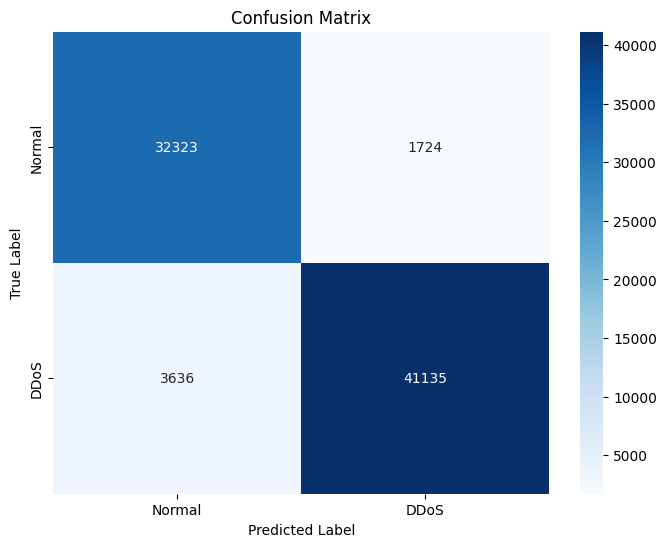

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Assuming you have the following variables
# y_test: True labels for the test set
# y_pred_binary: Predicted labels for the test set

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
conf_matrix_GRU = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(conf_matrix_GRU)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_GRU, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'DDoS'], yticklabels=['Normal', 'DDoS'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

# Assuming X_train and X_test are your normalized features
X_train, X_test, y_train, y_test = train_test_split(X_normalized, df['Category_encoded'], test_size=0.35, random_state=42)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Build the CNN model with a specified learning rate
learning_rate = 0.001  # Set your desired learning rate here

model_CNN = Sequential()
model_CNN.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_CNN.add(Dropout(0.2))
model_CNN.add(Conv1D(128, kernel_size=3, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(1, activation='sigmoid'))

# Use SGD optimizer with the specified learning rate
optimizer = SGD(learning_rate=learning_rate)

# Compile the model with the specified optimizer
model_CNN.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with early stopping and dropout
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_CNN.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model_CNN.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy_CNN = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy_CNN}')


Epoch 1/5
1830/1830 [==============================] - 25s 13ms/step - loss: 0.6390 - accuracy: 0.6542 - val_loss: 0.5665 - val_accuracy: 0.7496
Epoch 2/5
1830/1830 [==============================] - 17s 9ms/step - loss: 0.5162 - accuracy: 0.8178 - val_loss: 0.4327 - val_accuracy: 0.8868
Epoch 3/5
1830/1830 [==============================] - 18s 10ms/step - loss: 0.4032 - accuracy: 0.8757 - val_loss: 0.3360 - val_accuracy: 0.8949
Epoch 4/5
1830/1830 [==============================] - 18s 10ms/step - loss: 0.3291 - accuracy: 0.8903 - val_loss: 0.2764 - val_accuracy: 0.9074
Epoch 5/5
2464/2464 [==============================] - 7s 3ms/step
Accuracy: 0.9244335050369205


In [22]:
# Assuming y_test and y_pred_cnn are the true labels and predictions for the CNN model
conf_matrix_cnn = confusion_matrix(y_test, y_pred_binary)

precision_cnn = precision_score(y_test, y_pred_binary)
recall_cnn = recall_score(y_test, y_pred_binary)

print(f"Precision (CNN): {precision_cnn}")
print(f"Recall (CNN): {recall_cnn}")


Precision (CNN): 0.9533721120377509
Recall (CNN): 0.9115498872037703


2464/2464 [==============================] - 6s 2ms/step
Accuracy: 0.9244335050369205
F1 Score: 0.9319920527986482
Confusion Matrix:
[[32051  1996]
 [ 3960 40811]]


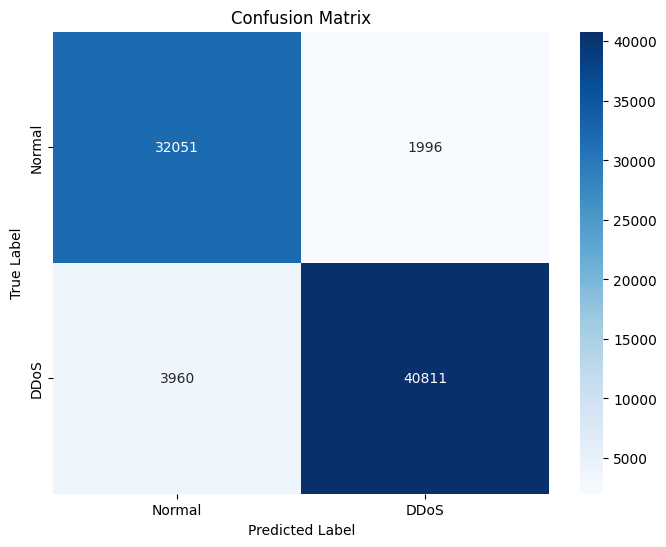

In [23]:
from sklearn.metrics import f1_score, confusion_matrix

# Evaluate the model on the test set
y_pred = model_CNN.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy_CNN = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy_CNN}')

# Calculate F1 score
f1_CNN = f1_score(y_test, y_pred_binary)
print(f'F1 Score: {f1_CNN}')

# Calculate confusion matrix
conf_matrix_CNN = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(conf_matrix_CNN)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_CNN, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'DDoS'], yticklabels=['Normal', 'DDoS'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [24]:
# print("Shapes - X_test_reshaped:", X_test_reshaped.shape, "y_pred:", y_pred.shape, "y_test_trimmed:", y_test_trimmed.shape)

In [27]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
# Create input layers for the functional API
input_CNN = Input(shape=(X_train.shape[1], 1))
input_GRU = Input(shape=(X_train.shape[1], 1))

# Get the output of each model given their respective input
output_CNN = model_CNN(input_CNN)
output_GRU = model_GRU(input_GRU)

# Combine CNN and GRU outputs
combined_output = Concatenate()([output_CNN, output_GRU])
combined_output = Dense(1, activation='sigmoid')(combined_output)

# Create the hybrid model using functional API
model_hybrid = Model(inputs=[input_CNN, input_GRU], outputs=combined_output)

# Compile the model
optimizer = Adam(learning_rate=0.0005)
model_hybrid.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Assuming X_train_reshaped and X_test_reshaped are the reshaped inputs for GRU and CNN respectively
model_hybrid.fit([X_train, X_train], y_train, epochs=5, batch_size=64,
                 validation_data=([X_test, X_test], y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model_hybrid.predict([X_test, X_test])
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy_hybrid = accuracy_score(y_test, y_pred_binary)
print(f'Hybrid Model Accuracy: {accuracy_hybrid}')

Epoch 1/5
2288/2288 [==============================] - 246s 104ms/step - loss: 0.2925 - accuracy: 0.9717 - val_loss: 0.1668 - val_accuracy: 0.9974
Epoch 2/5
2288/2288 [==============================] - 233s 102ms/step - loss: 0.1208 - accuracy: 0.9969 - val_loss: 0.0867 - val_accuracy: 0.9979
Epoch 3/5
2288/2288 [==============================] - 222s 97ms/step - loss: 0.0632 - accuracy: 0.9974 - val_loss: 0.0451 - val_accuracy: 0.9981
Epoch 4/5
2288/2288 [==============================] - 238s 104ms/step - loss: 0.0363 - accuracy: 0.9977 - val_loss: 0.0258 - val_accuracy: 0.9986
Epoch 5/5
2464/2464 [==============================] - 34s 13ms/step
Hybrid Model Accuracy: 0.9985155675099596


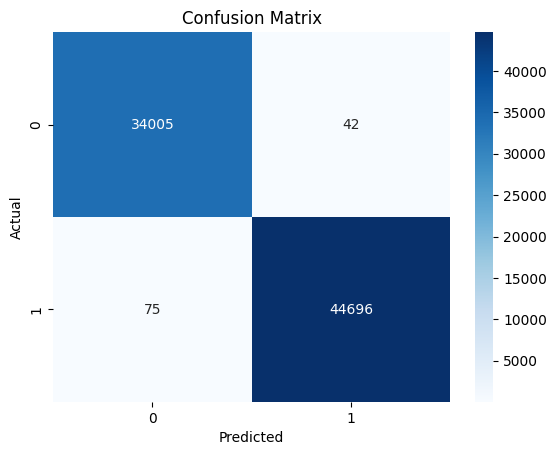

F1 Score: 0.9986928688735212


In [28]:
f1_hybrid = f1_score(y_test, y_pred_binary)

# Generate confusion matrix
conf_matrix_hybrid = confusion_matrix(y_test, y_pred_binary)

# Plot heatmap for confusion matrix
sns.heatmap(conf_matrix_hybrid, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'F1 Score: {f1_hybrid}')

In [29]:
# Assuming y_test and y_pred_hybrid are the true labels and predictions for the hybrid model
conf_matrix_hybrid = confusion_matrix(y_test, y_pred_binary)

precision_hybrid = precision_score(y_test, y_pred_binary)
recall_hybrid = recall_score(y_test, y_pred_binary)

print(f"Precision (Hybrid): {precision_hybrid}")
print(f"Recall (Hybrid): {recall_hybrid}")


Precision (Hybrid): 0.9990612007689212
Recall (Hybrid): 0.9983248084697683


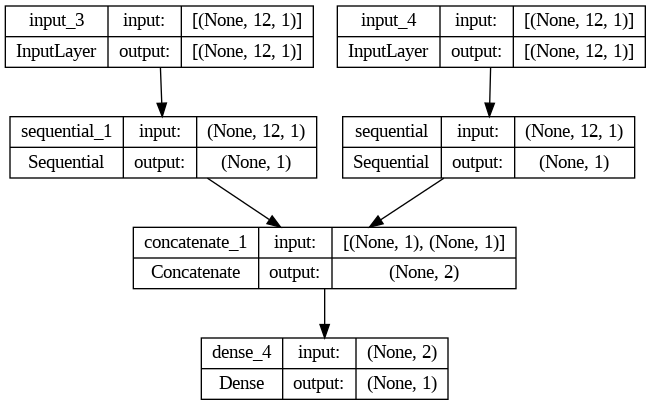

In [30]:
from tensorflow.keras.utils import plot_model
# Save the visual representation to a file (e.g., 'hybrid_model.png')
plot_model(model_hybrid, to_file='hybrid_model.png', show_shapes=True)


In [31]:
model_hybrid.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 12, 1)]              0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 12, 1)]              0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 1)                    57857     ['input_3[0][0]']             
                                                                                                  
 sequential (Sequential)     (None, 1)                    186945    ['input_4[0][0]']             
                                                                                              